# Implement Baseline Strategy

In [28]:
# auto reload
%load_ext autoreload
%autoreload 2

# Imports
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

import core_metrics, strategies, file_exports

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from strategies import ma_strategy

In [30]:
# running the strategy
# constants
investment_amount = 10000
test_data = pd.read_csv("../data/processed/training_data_70.csv")
short_ma = 20
long_ma = 50
result = ma_strategy(investment_amount, test_data, short_ma, long_ma)

In [31]:
result.tail()

,Open,High,Low,Close,Volume,Stock Splits,MA_short,MA_long,signal,position,trade_cost,market_ret,strategy_ret,strategy_ret_net,market_ret_net,cumulative_market,cumulative_strategy,portfolio_value
Date,,,,,,,,,,,,,,,,,,
2022-09-01,374.407243,378.114230,371.691310,377.771179,78740100,0.0,395.322696,381.919351,1,0.0,0.0,0.003138,0.003138,0.003138,0.003138,2.214502,1.720103,17201.031277
2022-09-02,381.449500,382.669283,371.967569,373.787720,99632100,0.0,394.311128,382.189609,1,0.0,0.0,-0.010545,-0.010545,-0.010545,-0.010545,2.191151,1.701965,17019.652668
2022-09-06,374.635883,375.579301,370.147465,372.377380,76637400,0.0,393.251915,382.202568,1,0.0,0.0,-0.003773,-0.003773,-0.003773,-0.003773,2.182884,1.695544,16955.435775
2022-09-07,372.062901,379.839031,371.843739,379.067139,70964200,0.0,392.605333,382.377722,1,0.0,0.0,0.017965,0.017965,0.017965,0.017965,2.222099,1.726004,17260.040118
2022-09-08,376.789646,382.002292,375.579372,381.544891,80821700,0.0,391.670963,382.753760,1,0.0,0.0,0.006536,0.006536,0.006536,0.006536,2.236624,1.737286,17372.859475


In [32]:
# export as csv in the data file
csv_name = "ma_baseline_strategy.csv"
output_folder = "../data/strategy_results/"

from file_exports import export_file
export_file(csv_name, output_folder, result)

Exported data as file ../data/strategy_results/ma_baseline_strategy.csv successfully.


## Core Performance Metrics
To evaluate the basline strategy, we will perform the following tests.


### 1. Profit & Loss Metrics
Let's examine the returns and P&L of the strategy and market portfolios, considering transaction cost and slippage amounts as defined above.

Final portfolio value: 17372.859474508765 on 2022-09-08 00:00:00
Strategy returned 73.72859474508763% from 2015-01-02 00:00:00 to 2022-09-08 00:00:00
Market returned 123.66239785226219 from 2015-01-02 00:00:00 to 2022-09-08 00:00:00

Annualized across 7.6824 years: 
MA Strategy returned 7.4542% per year
Buy & Hold the market returned 11.0467% per year


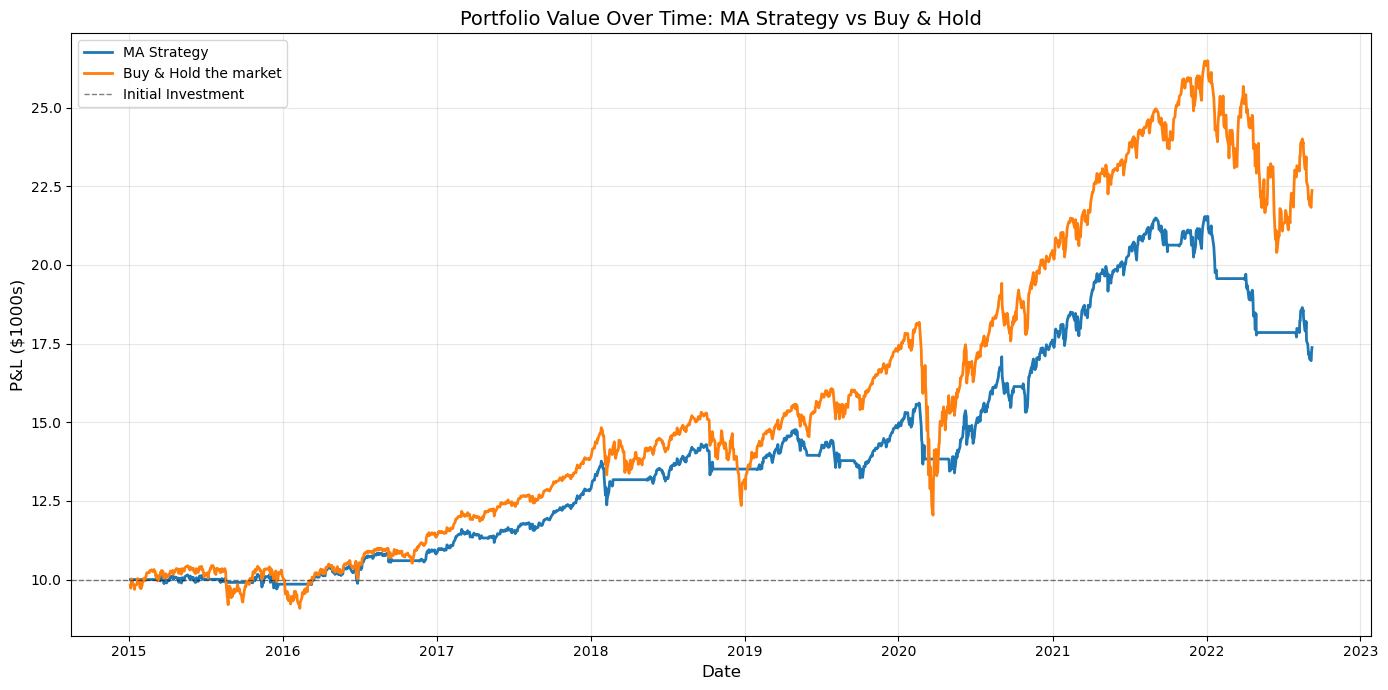

In [33]:
from core_metrics import pnl

graph_title = 'Portfolio Value Over Time: MA Strategy vs Buy & Hold'
strategy_name = "MA Strategy"
benchmark_name = "Buy & Hold the market"

result, strategy_annual_return, market_annual_return = pnl(result, investment_amount, strategy_name, benchmark_name, graph_title)

### 2. Performance Ratios

In [34]:
from core_metrics import performance_ratios

perf_ratios = performance_ratios(result)

print("WITHOUT transaction costs...")
print(f"Sharpe Ratio: {perf_ratios['sharpe ratio']}")
print(f"Information Ratio: {perf_ratios['information ratio']}")
print(f"Sortino Ratio: {perf_ratios['sortino ratio']} \n")

print("WITH transaction costs...")
print(f"Sharpe Ratio: {perf_ratios['sharpe with costs']}")
print(f"Information Ratios: {perf_ratios['information ratio with costs']}")
print(f"Sortino Ratio: {perf_ratios['sortino ratio with costs']}")


WITHOUT transaction costs...
Sharpe Ratio: 0.547192930998974
Information Ratio: 8.847738087754404
Sortino Ratio: 9.75160922921864 

WITH transaction costs...
Sharpe Ratio: 0.4816582193393633
Information Ratios: 8.842486080434036
Sortino Ratio: 8.572191864305008


In [35]:
from core_metrics import risk_metrics

risks = risk_metrics(result)
print(f"Max Drawdown: {(100 * risks['max_drawdown']):.2f}%")
print(f"Average Drawdown: {(100 * risks['avg_drawdown']):.2f}%")
print(f"Max Drawdown Duration: {(risks['max_dd_duration']):.2f} days")
print(f"Average Drawdown Duration: {(risks['avg_dd_duration']):.2f} days")
print(f"Volatility: {(100 * risks['volatility']):.2f}%")

Max Drawdown: -21.30%
Average Drawdown: -3.42%
Max Drawdown Duration: 171.00 days
Average Drawdown Duration: 14.44 days
Volatility: 11.31%


### 4. Trade Statistics

In [40]:
from core_metrics import trade_statistics

trade_stats = trade_statistics(result)
print(f"Total Number of Trades: {(result['position'] != 0).sum()}")
print(f"Average Holding Periods: {trade_stats['avg_holding_period']}")
print(f"Win Rate: {trade_stats['win_rate']}")
print(f"Win-Loss Ratio: {trade_stats['win_loss_ratio']}")
print(f"Profit Factor (gross profit/gross loss): {trade_stats['profit_factor']}")


Total Number of Trades: 36
Average Holding Periods: 113.05882352941177
Win Rate: 0.6470588235294118
Win-Loss Ratio: inf
Profit Factor (gross profit/gross loss): 5.459702925397624


### 5. Strategy Beta to Benchmark

In [37]:
from core_metrics import find_alpha, calmar_ratio, find_beta

beta = find_beta(result, result.index[0], result.index[-1])
print(f'Beta: {beta}')
alpha = find_alpha(result, strategy_annual_return, market_annual_return)
print(f'Alpha: {alpha}')
calmar = calmar_ratio(strategy_annual_return, risks['max_drawdown'])
print(f'Calmar Ratio: {calmar:.2f}')

Beta: 0.38083333823973853
Alpha: 0.020045193942311607
Calmar Ratio: 0.35


### 5. Consistency of Returns

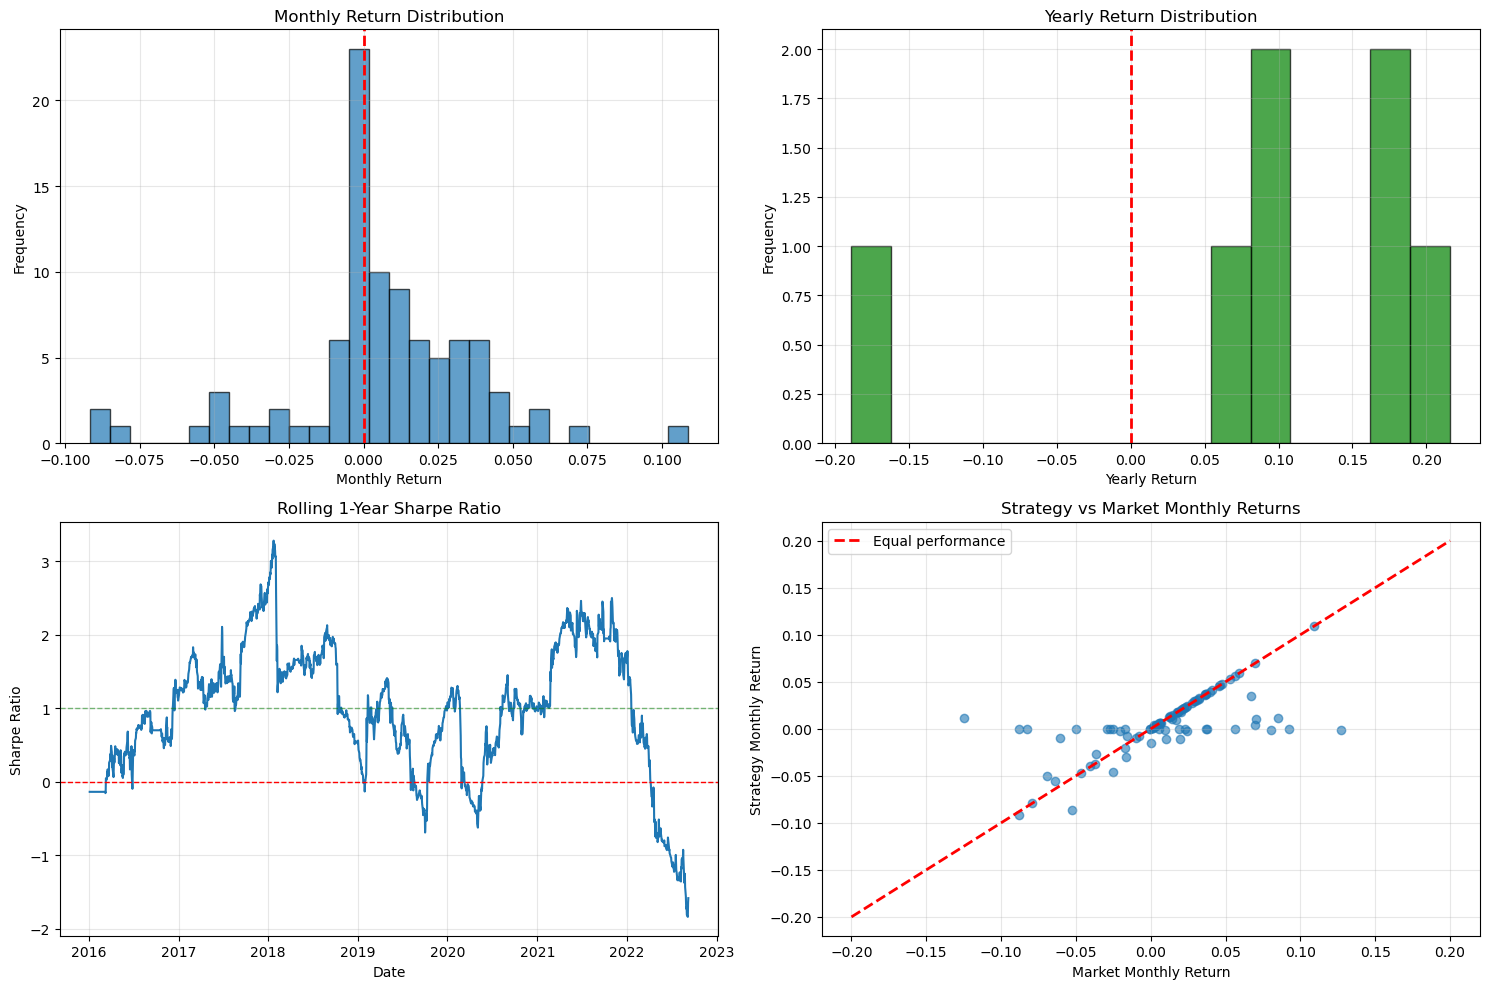

Percentage of Positive Months: 55.91%
Average Monthly Return: 0.65%
Median Monthly Return: 0.38%
Standard Deviation of Monthly Returns: 3.11%
Percentage of Positive Years: 75.00%
Average Yearly Return: 9.28%
Median Yearly Return: 9.90%


In [38]:
from core_metrics import consistency

window = 252 # trading days (for rolling sharpe)
consistency = consistency(result, window)

print(f"Percentage of Positive Months: {consistency['pct_positive_months']:.2%}")
print(f"Average Monthly Return: {consistency['avg_monthly_return']:.2%}")
print(f"Median Monthly Return: {consistency['median_monthly_return']:.2%}")
print(f"Standard Deviation of Monthly Returns: {consistency['std_monthly_return']:.2%}")

print(f"Percentage of Positive Years: {consistency['pct_positive_years']:.2%}")
print(f"Average Yearly Return: {consistency['avg_yearly_return']:.2%}")
print(f"Median Yearly Return: {consistency['median_yearly_return']:.2%}")


### 6. Sensitivity of Returns to Transaction Costs

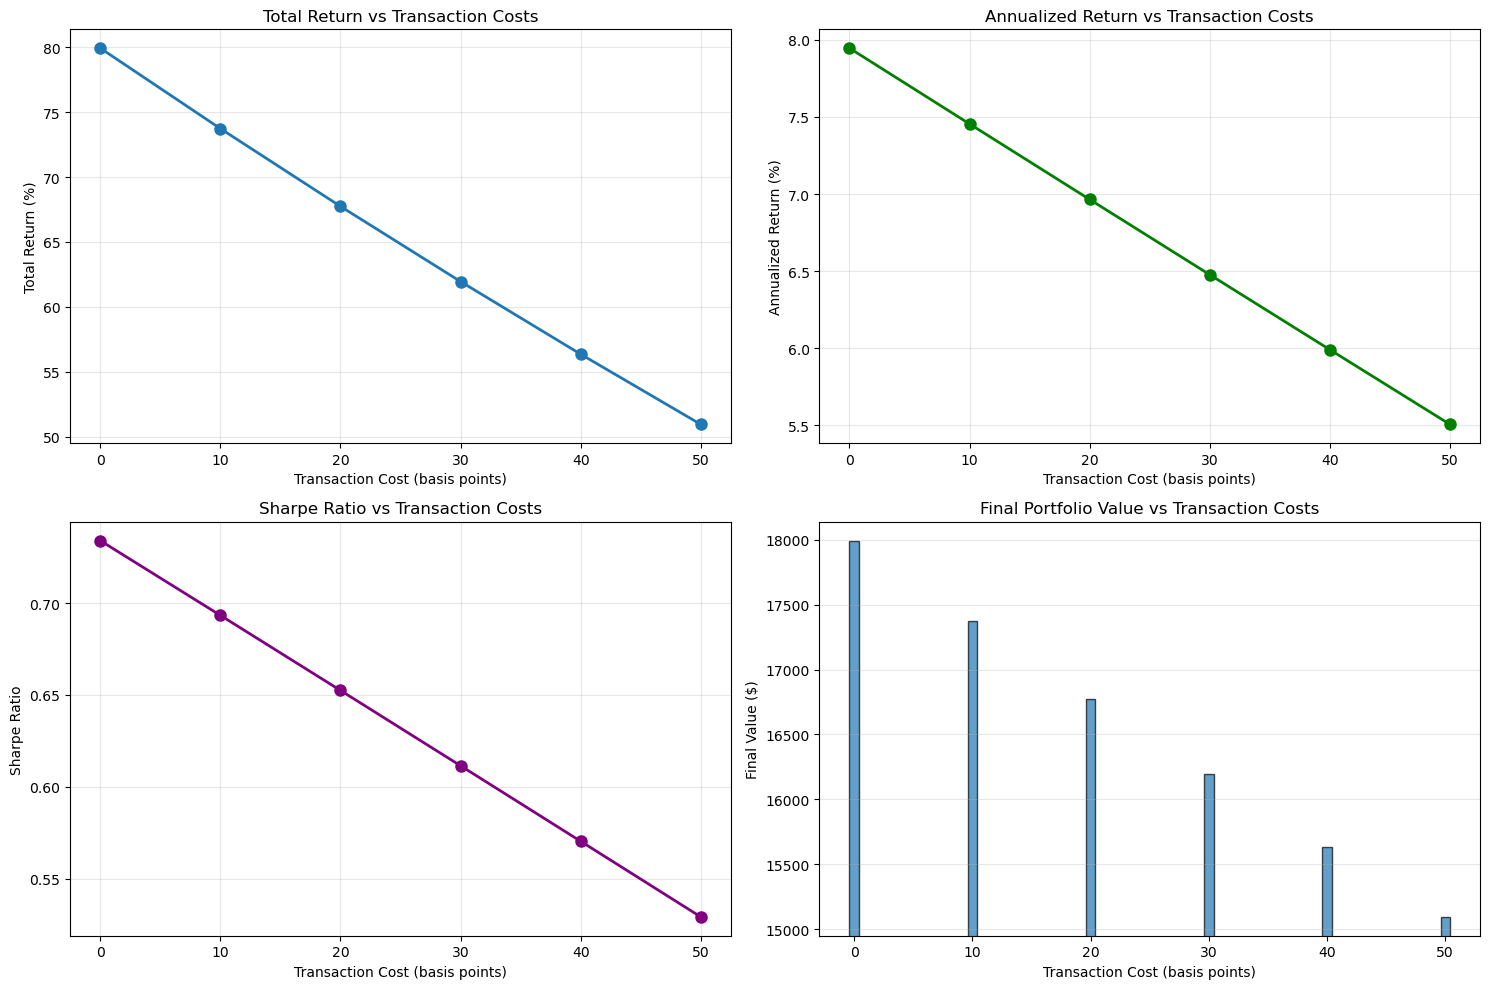

Transaction Cost Sensitivity Analysis
 cost_bps  cost_pct  total_return  annualized_return  sharpe_ratio  final_value
      0.0       0.0      0.799237           0.079454      0.733964 17992.366863
     10.0       0.1      0.737286           0.074542      0.693283 17372.859475
     20.0       0.2      0.677409           0.069648      0.652414 16774.093745
     30.0       0.3      0.619539           0.064770      0.611399 16195.394986
     40.0       0.4      0.563611           0.059911      0.570283 15636.109810
     50.0       0.5      0.509561           0.055068      0.529110 15095.605480


Strategy remains profitable at all tested cost levels


In [39]:
from core_metrics import sensitivity

prices_data = pd.read_csv("../data/processed/training_data_70.csv")
df = sensitivity(ma_strategy, investment_amount, prices_data, short_ma, long_ma)

